# Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

from sklearn.preprocessing import MinMaxScaler
import pickle

import os
for dirname,_,filenames in os.walk("input"):
    for filename in filenames:
        print(os.path.join(dirname,filename))

input\AUDUSD=X.csv
input\EURUSD=X.csv
input\GBPUSD=X.csv
input\ICICIBANK.NS.csv
input\SBIN.NS.csv


# Data Loading

In [2]:
df = pd.read_csv("input/ICICIBANK.NS.csv")

****Preliminary Analysis****

In [3]:
df.shape

(4201, 7)

In [4]:
df.head()

Date        Open        High        Low       Close  Adj Close  \
0  2006-06-01   98.545456  100.181816  96.572723   97.145454  77.050262   
1  2006-06-02   96.727272  100.727272  96.363632  100.354546  79.595551   
2  2006-06-05  100.545456  101.272728  96.363632   97.836365  77.598274   
3  2006-06-06   96.727272  100.690910  93.027275   98.672729  78.261627   
4  2006-06-07   95.290909   98.854546  95.272728   96.954544  76.898865   

      Volume  
0  4351248.0  
1  3278225.0  
2  3347795.0  
3  3471418.0  
4  2481330.0

# Data Preprocessing

In [5]:
# Printing minimum ans maximum values of each feature
for feature in df.columns:
    minimum_value = df[feature].min()
    maximum_value = df[feature].max()
    print(f"Feature Name: {feature:<10} | Minimum value: {minimum_value:<10} | Maximum value: {maximum_value:<10}","\n")
    print("-"*100)

Feature Name: Date       | Minimum value: 2006-06-01 | Maximum value: 2023-05-31 

----------------------------------------------------------------------------------------------------
Feature Name: Open       | Minimum value: 47.945454  | Maximum value: 956.0      

----------------------------------------------------------------------------------------------------
Feature Name: High       | Minimum value: 49.527271  | Maximum value: 958.849976 

----------------------------------------------------------------------------------------------------
Feature Name: Low        | Minimum value: 45.872726  | Maximum value: 946.799988 

----------------------------------------------------------------------------------------------------
Feature Name: Close      | Minimum value: 47.809093  | Maximum value: 954.299988 

----------------------------------------------------------------------------------------------------
Feature Name: Adj Close  | Minimum value: 39.704628  | Maximum value: 954.299988

In [6]:
# dropping Volume feature from the data because of contains single value only

df = df.drop(labels= 'Volume', axis= 1)

In [7]:
df.head()

Date        Open        High        Low       Close  Adj Close
0  2006-06-01   98.545456  100.181816  96.572723   97.145454  77.050262
1  2006-06-02   96.727272  100.727272  96.363632  100.354546  79.595551
2  2006-06-05  100.545456  101.272728  96.363632   97.836365  77.598274
3  2006-06-06   96.727272  100.690910  93.027275   98.672729  78.261627
4  2006-06-07   95.290909   98.854546  95.272728   96.954544  76.898865

In [8]:
# Checking null values

df.isnull().sum()

Date         0
Open         8
High         8
Low          8
Close        8
Adj Close    8
dtype: int64

In [9]:
# Removing the null value having samples

df = df.dropna()
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4193 entries, 0 to 4199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4193 non-null   object 
 1   Open       4193 non-null   float64
 2   High       4193 non-null   float64
 3   Low        4193 non-null   float64
 4   Close      4193 non-null   float64
 5   Adj Close  4193 non-null   float64
dtypes: float64(5), object(1)
memory usage: 229.3+ KB


In [11]:
# Converting object datatype Date feature into datetime datatype Date feature

df['Date'] = pd.to_datetime(df['Date'].values)

In [12]:
df.head()

Date        Open        High        Low       Close  Adj Close
0 2006-06-01   98.545456  100.181816  96.572723   97.145454  77.050262
1 2006-06-02   96.727272  100.727272  96.363632  100.354546  79.595551
2 2006-06-05  100.545456  101.272728  96.363632   97.836365  77.598274
3 2006-06-06   96.727272  100.690910  93.027275   98.672729  78.261627
4 2006-06-07   95.290909   98.854546  95.272728   96.954544  76.898865

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4193 entries, 0 to 4199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4193 non-null   datetime64[ns]
 1   Open       4193 non-null   float64       
 2   High       4193 non-null   float64       
 3   Low        4193 non-null   float64       
 4   Close      4193 non-null   float64       
 5   Adj Close  4193 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 229.3 KB


In [14]:
# Extracting year from the Date
df['Year'] = df['Date'].dt.year

df.head()

Date        Open        High        Low       Close  Adj Close  Year
0 2006-06-01   98.545456  100.181816  96.572723   97.145454  77.050262  2006
1 2006-06-02   96.727272  100.727272  96.363632  100.354546  79.595551  2006
2 2006-06-05  100.545456  101.272728  96.363632   97.836365  77.598274  2006
3 2006-06-06   96.727272  100.690910  93.027275   98.672729  78.261627  2006
4 2006-06-07   95.290909   98.854546  95.272728   96.954544  76.898865  2006

****Bar Chart****

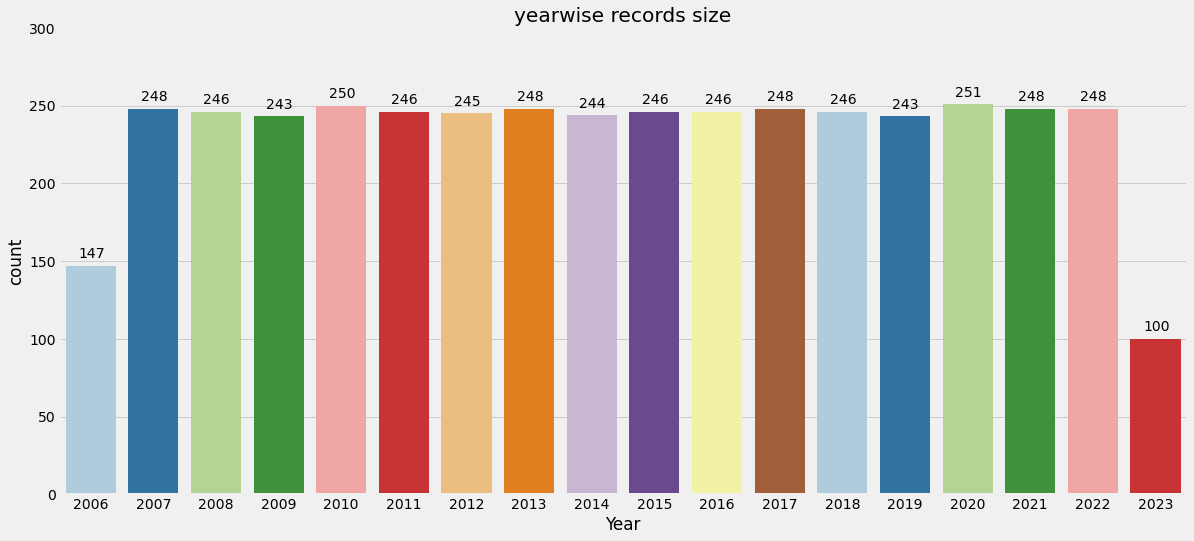

In [15]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    ax=sns.countplot("Year",data=df,palette="Paired")
    plt.title(label="yearwise records size")
    plt.ylim(0,300)
    for p in ax.patches:
        ax.annotate((p.get_height()),(p.get_x()+0.20,p.get_height()+5))
    plt.show()

****Line Plots****

In [16]:
with plt.style.context(style="fivethirtyeight"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
    plt.rcParams['font.size']=10
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        cols = df.columns[1:5]
        sns.lineplot(data=df, x='Date', y=cols[i], ax=ax)
        ax.set_title(f"Date vs {cols[i]}")
    plt.tight_layout()
    plt.show()

In [17]:
df.head()

Date        Open        High        Low       Close  Adj Close  Year
0 2006-06-01   98.545456  100.181816  96.572723   97.145454  77.050262  2006
1 2006-06-02   96.727272  100.727272  96.363632  100.354546  79.595551  2006
2 2006-06-05  100.545456  101.272728  96.363632   97.836365  77.598274  2006
3 2006-06-06   96.727272  100.690910  93.027275   98.672729  78.261627  2006
4 2006-06-07   95.290909   98.854546  95.272728   96.954544  76.898865  2006

In [18]:
df = df.set_index(keys="Date")
df.head()

Open        High        Low       Close  Adj Close  Year
Date                                                                      
2006-06-01   98.545456  100.181816  96.572723   97.145454  77.050262  2006
2006-06-02   96.727272  100.727272  96.363632  100.354546  79.595551  2006
2006-06-05  100.545456  101.272728  96.363632   97.836365  77.598274  2006
2006-06-06   96.727272  100.690910  93.027275   98.672729  78.261627  2006
2006-06-07   95.290909   98.854546  95.272728   96.954544  76.898865  2006

In [19]:
df['Year'].unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [20]:
df.tail()

Open        High         Low       Close   Adj Close  Year
Date                                                                        
2023-05-24  946.700012  953.849976  938.500000  940.650024  940.650024  2023
2023-05-25  937.000000  941.599976  932.950012  939.849976  939.849976  2023
2023-05-26  939.799988  952.450012  935.549988  950.700012  950.700012  2023
2023-05-29  953.849976  957.599976  946.799988  948.150024  948.150024  2023
2023-05-30  945.349976  952.299988  944.650024  949.950012  949.950012  2023

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
def feature_transformation(data):
    data = data[['Open', 'High', 'Low']]
    scaler = StandardScaler()
    scaler = scaler.fit(data.values)
    
    with open("models/ICICI_feature_scaler.pkl", mode='wb') as file:
        pickle.dump(obj=scaler, file=file)
    
    return scaler

In [23]:
def target_transformation(data):
    data = data[['Close']]
    scaler = StandardScaler()
    scaler = scaler.fit(data.values)
    
    with open("models/ICICI_target_scaler.pkl", mode='wb') as file:
        pickle.dump(obj=scaler, file=file)
    
    return scaler

In [24]:
feature_scaler = feature_transformation(df)
target_scaler = target_transformation(df)

In [25]:
df_train = df.loc[df['Year']!=2023]
df_train = df_train[df_train.columns[:-2]]
df_train.shape

(4093, 4)

In [26]:
df_train.head()

Open        High        Low       Close
Date                                                     
2006-06-01   98.545456  100.181816  96.572723   97.145454
2006-06-02   96.727272  100.727272  96.363632  100.354546
2006-06-05  100.545456  101.272728  96.363632   97.836365
2006-06-06   96.727272  100.690910  93.027275   98.672729
2006-06-07   95.290909   98.854546  95.272728   96.954544

In [27]:
df_test = df.loc[df['Year']==2023]
df_test = df_test[df_test.columns[:-2]]
df_test.shape

(100, 4)

In [28]:
df_test.head()

Open        High         Low       Close
Date                                                      
2023-01-02  894.000000  907.000000  894.000000  902.450012
2023-01-03  898.500000  905.950012  896.750000  901.349976
2023-01-04  899.000000  907.900024  894.799988  899.099976
2023-01-05  900.900024  903.000000  872.000000  879.150024
2023-01-06  878.950012  878.950012  860.500000  870.099976

In [29]:
X_train = df_train[df_train.columns[:-1]]
X_train.head()

Open        High        Low
Date                                         
2006-06-01   98.545456  100.181816  96.572723
2006-06-02   96.727272  100.727272  96.363632
2006-06-05  100.545456  101.272728  96.363632
2006-06-06   96.727272  100.690910  93.027275
2006-06-07   95.290909   98.854546  95.272728

In [30]:
y_train = df_train[df_train.columns[-1:]]
y_train.head()

Close
Date                  
2006-06-01   97.145454
2006-06-02  100.354546
2006-06-05   97.836365
2006-06-06   98.672729
2006-06-07   96.954544

In [31]:
X_test = df_test[df_test.columns[:-1]]
X_test.head()

Open        High         Low
Date                                          
2023-01-02  894.000000  907.000000  894.000000
2023-01-03  898.500000  905.950012  896.750000
2023-01-04  899.000000  907.900024  894.799988
2023-01-05  900.900024  903.000000  872.000000
2023-01-06  878.950012  878.950012  860.500000

In [32]:
y_test = df_test[df_test.columns[-1:]]
y_test.head()

Close
Date                  
2023-01-02  902.450012
2023-01-03  901.349976
2023-01-04  899.099976
2023-01-05  879.150024
2023-01-06  870.099976

In [33]:
X_train_columns = X_train.columns.tolist()
y_train_columns = y_train.columns.tolist()

print(X_train_columns)
print(y_train_columns)

['Open', 'High', 'Low']
['Close']


In [34]:
X_train_scaled = feature_scaler.transform(X_train.values)
X_train = pd.DataFrame(data=X_train_scaled, columns=[X_train_columns])

X_train.head()

Open      High       Low
0 -0.998792 -1.002305 -0.995318
1 -1.007463 -0.999724 -0.996323
2 -0.989253 -0.997142 -0.996323
3 -1.007463 -0.999896 -1.012363
4 -1.014314 -1.008586 -1.001568

In [35]:
X_test_scaled = feature_scaler.transform(X_test.values)
X_test = pd.DataFrame(data=X_test_scaled, columns=[X_train_columns])

X_test.head()

Open      High       Low
0  2.795034  2.815782  2.838513
1  2.816496  2.810813  2.851734
2  2.818881  2.820041  2.842359
3  2.827943  2.796853  2.732742
4  2.723255  2.683042  2.677453

In [36]:
y_train_scaled = target_scaler.transform(y_train.values)
y_train = pd.DataFrame(data=y_train_scaled, columns=[y_train_columns])

y_train.head()

Close
0 -1.004368
1 -0.989068
2 -1.001074
3 -0.997087
4 -1.005279

In [37]:
y_test_scaled = target_scaler.transform(y_test.values)
y_test = pd.DataFrame(data=y_test_scaled, columns=[y_train_columns])

y_test.head()

Close
0  2.835057
1  2.829813
2  2.819085
3  2.723971
4  2.680823

In [38]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (4093, 3)
Shape of y_train: (4093, 1)
Shape of X_test: (100, 3)
Shape of y_test: (100, 1)


****Reshaping 2D data inot 3D data****

In [39]:
X_train = np.array(X_train.values)
X_test = np.array(X_test.values)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [40]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (4093, 3, 1)
Shape of y_train: (4093, 1)
Shape of X_test: (100, 3, 1)
Shape of y_test: (100, 1)


# Algorithm: ConvolutionalLongShort-TermMemory

In [41]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input,Conv1D,MaxPool1D,Bidirectional,LSTM,Dense,Dropout,Flatten

In [42]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],X_train.shape[2])))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(300, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='sgd', loss=tf.keras.losses.MeanSquaredError())

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3, 32)             128       
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 64)             6208      
                                                                 
 bidirectional (Bidirectiona  (None, 3, 100)           46000     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 3, 100)           60400     
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 300)               0         
                                                                 
 dropout (Dropout)           (None, 300)               0

# Model Training

In [44]:
history = model.fit(x=X_train,y=y_train.values.ravel(),batch_size=32,epochs=200,validation_data=(X_test,y_test.values.ravel()))

Epoch 1/200
128/128 [==============================] - 15s 33ms/step - loss: 0.7316 - val_loss: 5.3871
Epoch 2/200
128/128 [==============================] - 1s 10ms/step - loss: 0.2644 - val_loss: 0.2892
Epoch 3/200
128/128 [==============================] - 1s 10ms/step - loss: 0.0438 - val_loss: 0.1166
Epoch 4/200
128/128 [==============================] - 1s 11ms/step - loss: 0.0314 - val_loss: 0.0989
Epoch 5/200
128/128 [==============================] - 1s 11ms/step - loss: 0.0236 - val_loss: 0.0736
Epoch 6/200
128/128 [==============================] - 1s 10ms/step - loss: 0.0206 - val_loss: 0.0319
Epoch 7/200
128/128 [==============================] - 1s 11ms/step - loss: 0.0161 - val_loss: 0.0313
Epoch 8/200
128/128 [==============================] - 1s 11ms/step - loss: 0.0154 - val_loss: 0.0236
Epoch 9/200
128/128 [==============================] - 1s 10ms/step - loss: 0.0147 - val_loss: 0.0203
Epoch 10/200
128/128 [==============================] - 1s 10ms/step - loss: 0.01

Epoch 81/200
128/128 [==============================] - 1s 9ms/step - loss: 0.0048 - val_loss: 0.0020
Epoch 82/200
128/128 [==============================] - 1s 9ms/step - loss: 0.0046 - val_loss: 0.0013
Epoch 83/200
128/128 [==============================] - 1s 9ms/step - loss: 0.0049 - val_loss: 0.0017
Epoch 84/200
128/128 [==============================] - 1s 9ms/step - loss: 0.0047 - val_loss: 0.0013
Epoch 85/200
128/128 [==============================] - 1s 9ms/step - loss: 0.0051 - val_loss: 0.0016
Epoch 86/200
128/128 [==============================] - 1s 9ms/step - loss: 0.0049 - val_loss: 0.0020
Epoch 87/200
128/128 [==============================] - 1s 9ms/step - loss: 0.0048 - val_loss: 0.0013
Epoch 88/200
128/128 [==============================] - 1s 9ms/step - loss: 0.0044 - val_loss: 0.0039
Epoch 89/200
128/128 [==============================] - 1s 9ms/step - loss: 0.0051 - val_loss: 0.0012
Epoch 90/200
128/128 [==============================] - 1s 9ms/step - loss: 0.0043

# Model Prediction

In [45]:
model_pred = model.predict(X_test,batch_size=16,verbose=1).ravel()
print(model_pred)

7/7 [==============================] - 3s 736us/step
[2.7791512 2.7853363 2.787196  2.7486622 2.6615438 2.6586812 2.651429
 2.6205842 2.620359  2.6354349 2.6574566 2.6232674 2.6297057 2.634971
 2.6576874 2.6791372 2.677344  2.6342785 2.4803526 2.3800063 2.4580045
 2.5655384 2.5234675 2.6223552 2.6058104 2.571226  2.58478   2.5993726
 2.5906267 2.5793314 2.600166  2.63694   2.6619532 2.6190784 2.6052673
 2.5772707 2.5461962 2.5089161 2.5219095 2.5344818 2.5791109 2.6036127
 2.586596  2.6117513 2.6563103 2.6392376 2.621973  2.523147  2.5233572
 2.456824  2.4920893 2.4421005 2.4706986 2.4837558 2.5442216 2.5928211
 2.6046655 2.5795581 2.5676801 2.5791965 2.5871427 2.6452906 2.6907406
 2.705641  2.7039049 2.6758227 2.675726  2.719485  2.7552998 2.8227684
 2.7955828 2.7516298 2.7553341 2.7514458 2.7908132 2.8221247 2.832853
 2.8405225 2.8496282 2.8806813 2.8627532 2.8636458 2.921173  2.926338
 2.9530444 2.9341452 2.9587266 2.9620311 2.9719954 2.990718  2.9712093
 2.9876246 2.9978309 2.99987

In [46]:
model_pred_full = [target_scaler.inverse_transform([[val]])[0][0] for val in model_pred]
print(model_pred_full)

[890.7239475865521, 892.0212387526869, 892.4112962307478, 884.3290052411145, 866.0562626076672, 865.4558241282986, 863.9346999785995, 857.4651466386406, 857.4178896749524, 860.5800056378008, 865.1989862812063, 858.0279295691657, 859.3783285611597, 860.4826912977616, 865.247393414381, 869.7464063795982, 869.3703009574834, 860.3374698982374, 828.0521123949326, 807.0048609156177, 823.3646716633906, 845.9194952954105, 837.0952949795579, 857.8366013754401, 854.3663900122926, 847.1124210824796, 849.9553400091149, 853.0160910350365, 851.1816707186642, 848.8125216057658, 853.1825155590092, 860.8957021581851, 866.1421252602097, 857.1493000961493, 854.2524732257513, 848.3803079156531, 841.8625474719954, 834.0431952284703, 836.7684968232595, 839.4054854044264, 848.7662647894574, 853.9054220850151, 850.336246138652, 855.6124736325899, 864.9585508511401, 861.3776231730661, 857.7564395629616, 837.0280850756459, 837.0721415677192, 823.1170851795599, 830.5138251478169, 820.0288801080671, 826.027214010

In [47]:
original_price = [target_scaler.inverse_transform([[val]])[0][0] for val in y_test.values.ravel()]
print(original_price)

[902.450012, 901.349976, 899.099976, 879.150024, 870.099976, 873.349976, 861.349976, 866.299988, 860.650024, 873.450012, 865.25, 865.150024, 869.5, 866.150024, 870.349976, 871.700012, 870.75, 855.299988, 817.200012, 823.5, 831.900024, 847.950012, 857.900024, 863.799988, 853.700012, 852.75, 859.099976, 860.799988, 853.849976, 850.650024, 865.299988, 870.799988, 869.450012, 862.650024, 852.099976, 854.200012, 839.25, 839.75, 839.700012, 856.400024, 854.849976, 856.299988, 854.0, 868.549988, 867.75, 872.099976, 855.950012, 842.650024, 828.400024, 830.349976, 825.900024, 823.900024, 836.25, 836.450012, 852.400024, 860.200012, 855.450012, 852.400024, 848.700012, 854.75, 851.0, 877.25, 883.799988, 884.599976, 875.0, 868.450012, 881.900024, 890.150024, 899.0, 901.299988, 896.849976, 891.900024, 894.400024, 885.650024, 904.75, 913.450012, 914.950012, 918.349976, 917.650024, 922.099976, 922.849976, 921.700012, 926.950012, 937.900024, 934.400024, 936.049988, 939.200012, 943.900024, 945.75, 946.3

# Result Analysis

In [48]:
Result = pd.DataFrame()
Result['True Price'] = original_price
Result['Model Prediction'] = model_pred_full

Result.head(10)

True Price  Model Prediction
0  902.450012        890.723948
1  901.349976        892.021239
2  899.099976        892.411296
3  879.150024        884.329005
4  870.099976        866.056263
5  873.349976        865.455824
6  861.349976        863.934700
7  866.299988        857.465147
8  860.650024        857.417890
9  873.450012        860.580006

In [ ]:
##AVERAGE TRUE RANGE

def calculate_true_range(high, low, close):
    return max(high - low, abs(high - close), abs(low - close))

def calculate_average_true_range(highs, lows, closes, period):
    atr_values = []
    
    # Calculate the first True Range
    true_range = calculate_true_range(highs[0], lows[0], closes[0])
    atr_values.append(true_range)
    
    # Calculate subsequent True Ranges and ATR values
    for i in range(1, len(highs)):
        true_range = calculate_true_range(highs[i], lows[i], closes[i])
        atr = ((period - 1) * atr_values[-1] + true_range) / period
        atr_values.append(atr)
    
    return atr_values


period = 3

atr_values = calculate_average_true_range(highs, lows, closes, period)

print("Average True Range (ATR) values:")
for atr in atr_values:
    print(atr)


##############################################################################################

##ALLIGATOR##

def calculate_alligator(highs, lows, jaw_period, teeth_period, lips_period):
    jaw_values = []
    teeth_values = []
    lips_values = []

    for i in range(len(highs)):
        if i < jaw_period - 1 or i < teeth_period - 1 or i < lips_period - 1:
            jaw_values.append(None)
            teeth_values.append(None)
            lips_values.append(None)
        else:
            jaw = (max(highs[i - jaw_period + 1 : i + 1]) + min(lows[i - jaw_period + 1 : i + 1])) / 2
            teeth = (max(highs[i - teeth_period + 1 : i + 1]) + min(lows[i - teeth_period + 1 : i + 1])) / 2
            lips = (max(highs[i - lips_period + 1 : i + 1]) + min(lows[i - lips_period + 1 : i + 1])) / 2

            jaw_values.append(jaw)
            teeth_values.append(teeth)
            lips_values.append(lips)

    return jaw_values, teeth_values, lips_values



jaw_period = 5
teeth_period = 8
lips_period = 13

jaw_values, teeth_values, lips_values = calculate_alligator(highs, lows, jaw_period, teeth_period, lips_period)

print("Jaw values:")
for value in jaw_values:
    print(value)

print("Teeth values:")
for value in teeth_values:
    print(value)

print("Lips values:")
for value in lips_values:
    print(value)

###########################################################################################################################################


## Bollinger Band ##

def calculate_bollinger_bands(prices, window_size, num_std):
    rolling_mean = np.mean(prices)
    rolling_std = np.std(prices)
    upper_band = rolling_mean + (num_std * rolling_std)
    lower_band = rolling_mean - (num_std * rolling_std)
    
    return upper_band, rolling_mean, lower_band



upper_band, middle_band, lower_band = calculate_bollinger_bands(closing_prices, window_size, num_std)

print("Upper Bollinger Band values:")
for price in upper_band:
    print(price)

print("Middle Bollinger Band values:")
for price in middle_band:
    print(price)

print("Lower Bollinger Band values:")
for price in lower_band:
    print(price)

#############################################################################################################################################

## PARABOLIC SAR ##

def calculate_parabolic_sar(highs, lows, acceleration=0.02, max_acceleration=0.20):
    sar_values = [float('NaN')] * len(highs)  # Initialize SAR values with NaN
    
    trend = 1  # 1 for uptrend, -1 for downtrend
    extreme_point = lows[0] if trend == 1 else highs[0]
    acceleration_factor = acceleration
    sar = extreme_point
    
    for i in range(2, len(highs)):
        prev_sar = sar_values[i - 1]
        curr_sar = sar
        
        if trend == 1:
            if highs[i] > extreme_point:
                extreme_point = highs[i]
                acceleration_factor = min(acceleration_factor + acceleration, max_acceleration)
            sar = prev_sar + acceleration_factor * (extreme_point - prev_sar)
            sar = min(sar, lows[i - 1], lows[i - 2])
            if sar > highs[i]:
                trend = -1
                extreme_point = lows[i]
                acceleration_factor = acceleration
        else:
            if lows[i] < extreme_point:
                extreme_point = lows[i]
                acceleration_factor = min(acceleration_factor + acceleration, max_acceleration)
            sar = prev_sar + acceleration_factor * (extreme_point - prev_sar)
            sar = max(sar, highs[i - 1], highs[i - 2])
            if sar < lows[i]:
                trend = 1
                extreme_point = highs[i]
                acceleration_factor = acceleration
        
        sar_values[i] = sar
    
    return sar_values


sar_values = calculate_parabolic_sar(highs, lows, acceleration, max_acceleration)

print("Parabolic SAR values:")
for sar in sar_values:
    print(sar)

#############################################################################################

## ichimoku cloud ##

def calculate_ichimoku_cloud(highs, lows, closes, conversion_period=9, base_period=26, span_b_period=52, displacement=26):
    conversion_line = [(max(highs[i - conversion_period + 1 : i + 1]) + min(lows[i - conversion_period + 1 : i + 1])) / 2 for i in range(conversion_period - 1, len(highs))]
    base_line = [(max(highs[i - base_period + 1 : i + 1]) + min(lows[i - base_period + 1 : i + 1])) / 2 for i in range(base_period - 1, len(highs))]
    span_a = [(conversion_line[i - conversion_period + 1] + base_line[i - base_period + 1]) / 2 for i in range(displacement - 1, len(highs) - displacement + 1)]
    span_b = [(max(highs[i - span_b_period + 1 : i + 1]) + min(lows[i - span_b_period + 1 : i + 1])) / 2 for i in range(displacement - 1, len(highs) - displacement + 1)]
    span_a = [None] * displacement + span_a[:-displacement]
    span_b = [None] * displacement + span_b[:-displacement]
    leading_span_a = span_a[displacement:]
    leading_span_b = span_b[displacement:]
    laggard_span = closes[:-displacement]
    
    return conversion_line, base_line, leading_span_a, leading_span_b, laggard_span

conversion_line, base_line, leading_span_a, leading_span_b, laggard_span = calculate_ichimoku_cloud(highs, lows, closes, conversion_period, base_period, span_b_period, displacement)

print("Conversion Line values:")
for value in conversion_line:
    print(value)

print("Base Line values:")
for value in base_line:
    print(value)

print("Leading Span A values:")
for value in leading_span_a:
    print(value)

print("Leading Span B values:")
for value in leading_span_b:
    print(value)

print("Laggard Span values:")
for value in laggard_span:
    print(value)
############################################################################################################################

##  ZIGZAG ##

def calculate_zigzag(highs, lows, percentage_threshold):
    zigzag_points = []
    current_high = highs[0]
    current_low = lows[0]
    direction = "down"
    
    for i in range(1, len(highs)):
        high_price = highs[i]
        low_price = lows[i]
        
        if direction == "down":
            if low_price <= current_low * (1 - percentage_threshold / 100):
                zigzag_points.append((i - 1, current_low))
                current_high = high_price
                direction = "up"
            elif high_price > current_low:
                current_low = low_price
        else:
            if high_price >= current_high * (1 + percentage_threshold / 100):
                zigzag_points.append((i - 1, current_high))
                current_low = low_price
                direction = "down"
            elif low_price < current_high:
                current_high = high_price
    
    return zigzag_points


zigzag_points = calculate_zigzag(highs, lows, percentage_threshold)

print("ZigZag points:")
for point in zigzag_points:
    print("Index:", point[0], "Price:", point[1])

###########################################################################################################################

###  weighted moving average ###


def calculate_wma(prices, window_size):
    weights = range(1, window_size + 1)
    weights_sum = sum(weights)
    wma_values = []
    
    for i in range(window_size, len(prices) + 1):
        window_prices = prices[i - window_size:i]
        wma = sum([price * weight for price, weight in zip(window_prices, weights)]) / weights_sum
        wma_values.append(wma)
    
    return wma_values



wma_values = calculate_wma(prices, window_size)

print("Weighted Moving Average values:")
for value in wma_values:
    print(value)


###########################################################################################################

## Donchain Chanels  ####


def calculate_donchian_channels(highs, lows, channel_size):
    upper_channel = []
    lower_channel = []
    
    for i in range(channel_size, len(highs)):
        high_range = highs[i - channel_size + 1: i + 1]
        low_range = lows[i - channel_size + 1: i + 1]
        upper_channel.append(max(high_range))
        lower_channel.append(min(low_range))
    
    return upper_channel, lower_channel



upper_channel, lower_channel = calculate_donchian_channels(highs, lows, channel_size)

print("Upper Donchian Channel values:")
for value in upper_channel:
    print(value)

print("Lower Donchian Channel values:")
for value in lower_channel:
    print(value)

########################################################################################################################

###  SUPER TREND  ####

def calculate_super_trend(highs, lows, closes, multiplier, period):
    atr_values = calculate_average_true_range(highs, lows, closes, period)
    super_trend = []
    up_trend = True
    basic_upper_band = (highs[period - 1] + lows[period - 1]) / 2 + multiplier * atr_values[period - 1]
    basic_lower_band = (highs[period - 1] + lows[period - 1]) / 2 - multiplier * atr_values[period - 1]
    super_trend.append(basic_upper_band if up_trend else basic_lower_band)

    for i in range(period, len(closes)):
        current_close = closes[i]
        previous_super_trend = super_trend[i - period]
        current_atr = atr_values[i]

        if up_trend:
            current_upper_band = max(basic_upper_band, previous_super_trend)
            super_trend.append(current_upper_band if current_close <= current_upper_band else basic_lower_band)
            if current_close <= current_upper_band:
                up_trend = False
                basic_lower_band = current_close - multiplier * current_atr
        else:
            current_lower_band = min(basic_lower_band, previous_super_trend)
            super_trend.append(current_lower_band if current_close >= current_lower_band else basic_upper_band)
            if current_close >= current_lower_band:
                up_trend = True
                basic_upper_band = current_close + multiplier * current_atr

    return super_trend

def calculate_average_true_range(highs, lows, closes, period):
    tr_values = []
    atr_values = []

    for i in range(1, len(highs)):
        high = highs[i]
        low = lows[i]
        previous_close = closes[i - 1]
        tr_values.append(max(high - low, abs(high - previous_close), abs(low - previous_close)))

    atr_values.append(sum(tr_values[:period]) / period)

    for i in range(period, len(tr_values)):
        atr_values.append((atr_values[-1] * (period - 1) + tr_values[i]) / period)

    return atr_values


super_trend_values = calculate_super_trend(highs, lows, closes, multiplier, period)

print("SuperTrend values:")
for value in super_trend_values:
    print(value)

###############################################################################################################################

## VOLUME weighted average price  ####
 
def calculate_vwap(prices, volumes, period):
    vwap_values = []
    
    for i in range(period - 1, len(prices)):
        price_range = prices[i - period + 1: i + 1]
        volume_range = volumes[i - period + 1: i + 1]
        total_volume = sum(volume_range)
        weighted_prices = [price * volume for price, volume in zip(price_range, volume_range)]
        vwap = sum(weighted_prices) / total_volume
        vwap_values.append(vwap)
    
    return vwap_values



vwap_values = calculate_vwap(prices, volumes, period)

print("VWAP values:")
for value in vwap_values:
    print(value)

####################################################################################################

### ADX  ####

def calculate_adx(highs, lows, closes, period):
    tr_values = []
    dm_plus_values = []
    dm_minus_values = []
    
    for i in range(1, len(highs)):
        high = highs[i]
        low = lows[i]
        previous_high = highs[i - 1]
        previous_low = lows[i - 1]
        tr_values.append(max(high - low, abs(high - previous_close), abs(low - previous_close)))
        dm_plus = high - previous_high if high - previous_high > previous_low - low else 0
        dm_minus = previous_low - low if previous_low - low > high - previous_high else 0
        dm_plus_values.append(dm_plus)
        dm_minus_values.append(dm_minus)
    
    atr_values = calculate_average_true_range(tr_values, period)
    di_plus_values = calculate_directional_index(dm_plus_values, atr_values, period)
    di_minus_values = calculate_directional_index(dm_minus_values, atr_values, period)
    
    dx_values = [(abs(di_plus - di_minus) / (di_plus + di_minus)) * 100 for di_plus, di_minus in zip(di_plus_values, di_minus_values)]
    
    adx_values = calculate_smoothing(dx_values, period)
    
    return adx_values

def calculate_average_true_range(tr_values, period):
    atr_values = []
    atr_values.append(sum(tr_values[:period]) / period)
    
    for i in range(period, len(tr_values)):
        atr_values.append((atr_values[-1] * (period - 1) + tr_values[i]) / period)
    
    return atr_values

def calculate_directional_index(dm_values, atr_values, period):
    di_values = []
    
    for i in range(period, len(dm_values)):
        di_values.append((sum(dm_values[i - period + 1: i + 1]) / sum(atr_values[i - period + 1: i + 1])) * 100)
    
    return di_values

def calculate_smoothing(values, period):
    smoothed_values = []
    smoothed_values.append(sum(values[:period]) / period)
    
    for i in range(period, len(values)):
        smoothed_values.append((smoothed_values[-1] * (period - 1) + values[i]) / period)
    
    return smoothed_values



adx_values = calculate_adx(highs, lows, closes, period)

print("ADX values:")
for value in adx_values:
    print(value)


##########################################################################################################


### Accumulation/Distribution  ###

def calculate_accumulation_distribution(highs, lows, closes, volumes):
    ad_values = []
    ad = 0
    
    for i in range(1, len(closes)):
        current_high = highs[i]
        previous_high = highs[i - 1]
        current_low = lows[i]
        previous_low = lows[i - 1]
        current_close = closes[i]
        previous_close = closes[i - 1]
        current_volume = volumes[i]
        
        if current_high != current_low:
            mf_multiplier = ((current_close - current_low) - (current_high - current_close)) / (current_high - current_low)
            mf_volume = mf_multiplier * current_volume
            ad += mf_volume
        
        ad_values.append(ad)
    
    return ad_values


ad_values = calculate_accumulation_distribution(highs, lows, closes, volumes)

print("Accumulation/Distribution values:")
for value in ad_values:
    print(value)


###################################################################################################################################################

### AROON  ###

def calculate_aroon(highs, lows, period):
    aroon_up = []
    aroon_down = []

    for i in range(period, len(highs) + 1):
        high_period = highs[i - period:i]
        low_period = lows[i - period:i]
        high_index = high_period.index(max(high_period))
        low_index = low_period.index(min(low_period))
        aroon_up.append((period - high_index) / period * 100)
        aroon_down.append((period - low_index) / period * 100)

    return aroon_up, aroon_down



aroon_up, aroon_down = calculate_aroon(highs, lows, period)

print("Aroon Up values:")
for value in aroon_up:
    print(value)

print("Aroon Down values:")
for value in aroon_down:
    print(value)


###########################################################################################################################

### aroon_oscillator  ###

def calculate_aroon_oscillator(highs, period):
    aroon_up = []
    aroon_down = []
    aroon_oscillator = []

    for i in range(period - 1, len(highs)):
        highest_high_index = i - highs[i - period + 1:i + 1].index(max(highs[i - period + 1:i + 1]))
        lowest_low_index = i - highs[i - period + 1:i + 1].index(min(highs[i - period + 1:i + 1]))

        aroon_up_value = ((period - (i - highest_high_index)) / period) * 100
        aroon_down_value = ((period - (i - lowest_low_index)) / period) * 100

        aroon_up.append(aroon_up_value)
        aroon_down.append(aroon_down_value)
        aroon_oscillator.append(aroon_up_value - aroon_down_value)

    return aroon_oscillator



aroon_oscillator_values = calculate_aroon_oscillator(highs, period)

print("Aroon Oscillator values:")
for value in aroon_oscillator_values:
    print(value)

###############################################################################################################################

### Balance of power  ###

def calculate_balance_of_power(opens, highs, lows, closes):
    bop_values = []
    
    for i in range(len(opens)):
        bop = (closes[i] - opens[i]) / (highs[i] - lows[i])
        bop_values.append(bop)
    
    return bop_values



bop_values = calculate_balance_of_power(opens, highs, lows, closes)

print("Balance of Power (BOP) values:")
for value in bop_values:
    print(value)


####################################################################################################

### bollinger %b   ###




def calculate_bollinger_b(prices, window_size, num_std):
    sma = calculate_sma(prices, window_size)
    std_dev = calculate_std_dev(prices, window_size)
    upper_band = [sma[i] + num_std * std_dev[i] for i in range(len(prices) - window_size + 1)]
    lower_band = [sma[i] - num_std * std_dev[i] for i in range(len(prices) - window_size + 1)]
    b_percent = [(prices[i + window_size - 1] - lower_band[i]) / (upper_band[i] - lower_band[i]) for i in range(len(upper_band))]
    return b_percent

def calculate_sma(prices, window_size):
    sma_values = []
    for i in range(len(prices) - window_size + 1):
        sma = sum(prices[i:i+window_size]) / window_size
        sma_values.append(sma)
    return sma_values

def calculate_std_dev(prices, window_size):
    std_dev_values = []
    for i in range(len(prices) - window_size + 1):
        window_prices = prices[i:i+window_size]
        std_dev = statistics.stdev(window_prices)
        std_dev_values.append(std_dev)
    return std_dev_values



b_percent_values = calculate_bollinger_b(prices, window_size, num_std)

print("Bollinger %B values:")
for value in b_percent_values:
    print(value)


###############################################################################################

### Bollinger bandwidth ###


def calculate_bollinger_bandwidth(prices, window_size, std_multiplier):
    sma_values = calculate_sma(prices, window_size)
    std_dev = calculate_standard_deviation(prices, window_size)
    upper_band = [sma + std_multiplier * std for sma, std in zip(sma_values, std_dev)]
    lower_band = [sma - std_multiplier * std for sma, std in zip(sma_values, std_dev)]
    bandwidth = [(upper - lower) / sma * 100 for upper, lower, sma in zip(upper_band, lower_band, sma_values)]
    return bandwidth

def calculate_sma(prices, window_size):
    sma_values = []
    for i in range(window_size - 1, len(prices)):
        sma = sum(prices[i - window_size + 1:i + 1]) / window_size
        sma_values.append(sma)
    return sma_values

def calculate_standard_deviation(prices, window_size):
    std_dev_values = []
    for i in range(window_size - 1, len(prices)):
        std_dev = statistics.stdev(prices[i - window_size + 1:i + 1])
        std_dev_values.append(std_dev)
    return std_dev_values



bandwidth_values = calculate_bollinger_bandwidth(prices, window_size, std_multiplier)

print("Bollinger Bandwidth values:")
for value in bandwidth_values:
    print(value)



#####################################################################################################################################################################

### Bull Bear Power  ###

def calculate_bull_bear_power(highs, lows, period):
    bull_power = [high - ((high + low) / 2) for high, low in zip(highs, lows)]
    bear_power = [low - ((high + low) / 2) for high, low in zip(highs, lows)]

    bull_power_average = calculate_simple_moving_average(bull_power, period)
    bear_power_average = calculate_simple_moving_average(bear_power, period)

    return bull_power_average, bear_power_average

def calculate_simple_moving_average(data, period):
    sma = []
    for i in range(period - 1, len(data)):
        sma.append(sum(data[i - period + 1: i + 1]) / period)
    return sma



bull_power_average, bear_power_average = calculate_bull_bear_power(highs, lows, period)

print("Bull Power Average:")
for value in bull_power_average:
    print(value)

print("Bear Power Average:")
for value in bear_power_average:
    print(value)



#####################################################################################################################################################################


### CCI ###

def calculate_typical_price(highs, lows, closes):
    return [(high + low + close) / 3 for high, low, close in zip(highs, lows, closes)]

def calculate_mean_deviation(typical_prices, period):
    mean_deviations = []
    
    for i in range(period - 1, len(typical_prices)):
        price_range = typical_prices[i - period + 1: i + 1]
        mean = sum(price_range) / period
        deviations = [abs(price - mean) for price in price_range]
        mean_deviation = sum(deviations) / period
        mean_deviations.append(mean_deviation)
    
    return mean_deviations

def calculate_cci(typical_prices, mean_deviations, closes, period):
    cci_values = []
    
    for i in range(period - 1, len(typical_prices)):
        typical_price = typical_prices[i]
        mean_deviation = mean_deviations[i - period + 1]
        mean = sum(closes[i - period + 1: i + 1]) / period
        cci = (typical_price - mean) / (0.015 * mean_deviation)
        cci_values.append(cci)
    
    return cci_values


typical_prices = calculate_typical_price(highs, lows, closes)
mean_deviations = calculate_mean_deviation(typical_prices, period)
cci_values = calculate_cci(typical_prices, mean_deviations, closes, period)

print("CCI values:")
for value in cci_values:
    print(value)


#####################################################################################################################################################################

### rate of change  ###


def calculate_rate_of_change(prices, period):
    roc_values = []
    
    for i in range(period, len(prices)):
        prev_price = prices[i - period]
        current_price = prices[i]
        roc = ((current_price - prev_price) / prev_price) * 100
        roc_values.append(roc)
    
    return roc_values



roc_values = calculate_rate_of_change(prices, period)

print("Rate of Change (ROC) values:")
for value in roc_values:
    print(value)


#####################################################################################################################################################################


### DPO  ###


def calculate_dpo(prices, period):
    dpo_values = []
    
    for i in range(period, len(prices) - period // 2):
        centered_price = prices[i - period // 2]
        dpo = prices[i] - centered_price
        dpo_values.append(dpo)
    
    return dpo_values


dpo_values = calculate_dpo(prices, period)

print("Detrended Price Oscillator values:")
for value in dpo_values:
    print(value)

#####################################################################################################################################################################


def calculate_williams_r(highs, lows, closes, period):
    williams_r_values = []
    
    for i in range(period - 1, len(closes)):
        highest_high = max(highs[i - period + 1: i + 1])
        lowest_low = min(lows[i - period + 1: i + 1])
        current_close = closes[i]
        
        williams_r = (highest_high - current_close) / (highest_high - lowest_low) * -100
        williams_r_values.append(williams_r)
    
    return williams_r_values



williams_r_values = calculate_williams_r(highs, lows, closes, period)

print("Williams %R values:")
for value in williams_r_values:
    print(value)


#####################################################################################################################################################################

### stochastic_oscillator ###

def calculate_stochastic_oscillator(highs, lows, closes, lookback_period, smoothing_period):
    stochastic_values = []
    
    for i in range(lookback_period - 1, len(closes)):
        recent_highs = highs[i - lookback_period + 1: i + 1]
        recent_lows = lows[i - lookback_period + 1: i + 1]
        recent_closes = closes[i - lookback_period + 1: i + 1]
        highest_high = max(recent_highs)
        lowest_low = min(recent_lows)
        close = closes[i]
        stochastic_value = (close - lowest_low) / (highest_high - lowest_low) * 100
        stochastic_values.append(stochastic_value)
    
    smoothed_values = calculate_sma(stochastic_values, smoothing_period)
    
    return smoothed_values

def calculate_sma(values, period):
    sma_values = []
    
    for i in range(period - 1, len(values)):
        period_values = values[i - period + 1: i + 1]
        sma = sum(period_values) / period
        sma_values.append(sma)
    
    return sma_values



stochastic_values = calculate_stochastic_oscillator(highs, lows, closes, lookback_period, smoothing_period)

print("Stochastic Oscillator values:")
for value in stochastic_values:
    print(value)

#####################################################################################################################################################################

### RSI ###

def calculate_rsi(prices, period):
    gains = []
    losses = []
    avg_gain = 0
    avg_loss = 0
    rsi_values = []

    for i in range(1, len(prices)):
        price_diff = prices[i] - prices[i - 1]
        if price_diff > 0:
            gains.append(price_diff)
            losses.append(0)
        elif price_diff < 0:
            gains.append(0)
            losses.append(abs(price_diff))
        else:
            gains.append(0)
            losses.append(0)

        if i >= period:
            avg_gain = sum(gains[i - period + 1:i + 1]) / period
            avg_loss = sum(losses[i - period + 1:i + 1]) / period
            rs = avg_gain / avg_loss if avg_loss != 0 else 0
            rsi = 100 - (100 / (1 + rs))
            rsi_values.append(rsi)
    
    return rsi_values



rsi_values = calculate_rsi(prices, lookback_period)

print("RSI values:")
for value in rsi_values:
    print(value)

#####################################################################################################################################################################

### momentum ###

def calculate_momentum(prices, period):
    momentum_values = []
    
    for i in range(period, len(prices)):
        current_price = prices[i]
        past_price = prices[i - period]
        momentum = current_price - past_price
        momentum_values.append(momentum)
    
    return momentum_values



momentum_values = calculate_momentum(prices, period)

print("Momentum values:")
for value in momentum_values:
    print(value)

#####################################################################################################################################################################

#### stochastic_rsi ###


def calculate_stochastic_rsi(prices, period, rsi_period, k_period, d_period):
    rsi_values = calculate_rsi(prices, rsi_period)
    rsi_values = rsi_values[rsi_period-1:]
    
    k_values = []
    for i in range(len(rsi_values)-period+1):
        rsi_slice = rsi_values[i:i+period]
        rsi_min = min(rsi_slice)
        rsi_max = max(rsi_slice)
        k = (rsi_values[i+period-1] - rsi_min) / (rsi_max - rsi_min)
        k_values.append(k)
    
    d_values = calculate_sma(k_values, d_period)
    
    return k_values, d_values

def calculate_rsi(prices, period):
    deltas = [prices[i] - prices[i - 1] for i in range(1, len(prices))]
    gains = [delta if delta > 0 else 0 for delta in deltas]
    losses = [-delta if delta < 0 else 0 for delta in deltas]
    avg_gain = calculate_sma(gains, period)
    avg_loss = calculate_sma(losses, period)
    rs = [avg_gain[i] / avg_loss[i] for i in range(len(avg_gain))]
    rsi = [100 - (100 / (1 + rs[i])) for i in range(len(rs))]
    return rsi

def calculate_sma(values, period):
    sma = []
    for i in range(period-1, len(values)):
        sma_value = sum(values[i-period+1:i+1]) / period
        sma.append(sma_value)
    return sma



k_values, d_values = calculate_stochastic_rsi(prices, period, rsi_period, k_period, d_period)

print("STOCHASTIC_RSI K values:")
for value in k_values:
    print(value)

print("STOCHASTIC_RSI D values:")
for value in d_values:
    print(value)

#####################################################################################################################################################################

### Gator ###
def calculate_gator(highs, lows, jaws_period=13, teeth_period=8, lips_period=5):
    jaws = [(max(highs[i - jaws_period + 1 : i + 1]) + min(lows[i - jaws_period + 1 : i + 1])) / 2 for i in range(jaws_period - 1, len(highs))]
    teeth = [(max(highs[i - teeth_period + 1 : i + 1]) + min(lows[i - teeth_period + 1 : i + 1])) / 2 for i in range(teeth_period - 1, len(highs))]
    lips = [(max(highs[i - lips_period + 1 : i + 1]) + min(lows[i - lips_period + 1 : i + 1])) / 2 for i in range(lips_period - 1, len(highs))]

    upper_histogram = [jaws[i] - teeth[i] for i in range(len(jaws))]
    lower_histogram = [-teeth[i] + lips[i] for i in range(len(lips))]

    return upper_histogram, lower_histogram



upper_histogram, lower_histogram = calculate_gator(highs, lows, jaws_period, teeth_period, lips_period)

print("Upper Gator Histogram:")
for value in upper_histogram:
    print(value)

print("Lower Gator Histogram:")
for value in lower_histogram:
    print(value)

#####################################################################################################################################################################


### DEMARKER ###

def calculate_demarker(highs, lows, period):
    demarker_values = []
    
    for i in range(period - 1, len(highs)):
        high_range = highs[i - period + 1: i + 1]
        low_range = lows[i - period + 1: i + 1]
        
        demarker = calculate_demarker_value(high_range, low_range)
        demarker_values.append(demarker)
    
    return demarker_values

def calculate_demarker_value(high_range, low_range):
    demarker = 0.0
    
    highest_high = max(high_range)
    lowest_low = min(low_range)
    price_range = highest_high - lowest_low
    
    if price_range > 0:
        demarker = (highest_high - high_range[-1]) / price_range
    
    return demarker



demarker_values = calculate_demarker(highs, lows, period)

print("DeMarker values:")
for value in demarker_values:
    print(value)


#####################################################################################################################################################################

### Earnings per Share   ###

def calculate_eps(net_income, average_shares):
    eps = net_income / average_shares
    return eps

net_income = 1000000  # Replace with the actual net income of the company
average_shares = 5000000  # Replace with the actual average number of shares
eps = calculate_eps(net_income, average_shares)
print("Earnings per Share (EPS):", eps)


#####################################################################################################################################################################


def calculate_pe_ratio(stock_price, eps):
    pe_ratio = stock_price / eps
    return pe_ratio

stock_price = 50.0  # Replace with the actual stock price
eps = 2.5  # Replace with the actual earnings per share
pe_ratio = calculate_pe_ratio(stock_price, eps)
print("Price-to-Earnings Ratio (P/E ratio):", pe_ratio)

#####################################################################################################################################################################


def calculate_pe_ratio(stock_price, earnings_per_share):
    pe_ratio = stock_price / earnings_per_share
    return pe_ratio


stock_price = 50.0  # Replace with the actual stock price
earnings_per_share = 2.5  # Replace with the actual earnings per share
pe_ratio = calculate_pe_ratio(stock_price, earnings_per_share)
print("Price-to-Earnings Ratio (P/E ratio):", pe_ratio)

#####################################################################################################################################################################


def calculate_pb_ratio(stock_price, book_value_per_share):
    pb_ratio = stock_price / book_value_per_share
    return pb_ratio


stock_price = 100.0  # Replace with the actual stock price
book_value_per_share = 20.0  # Replace with the actual book value per share
pb_ratio = calculate_pb_ratio(stock_price, book_value_per_share)
print("Price-to-Book Ratio (P/B ratio):", pb_ratio)


#####################################################################################################################################################################

def calculate_dividend_yield(annual_dividend, stock_price):
    dividend_yield = (annual_dividend / stock_price) * 100
    return dividend_yield

annual_dividend = 2.5  # Replace with the actual annual dividend per share
stock_price = 50.0  # Replace with the actual stock price
dividend_yield = calculate_dividend_yield(annual_dividend, stock_price)
print("Dividend Yield:", dividend_yield)


#####################################################################################################################################################################


### REO  ###
def calculate_roe(net_income, shareholders_equity):
    roe = (net_income / shareholders_equity) * 100
    return roe


net_income = 1000000  # Replace with the actual net income
shareholders_equity = 5000000  # Replace with the actual shareholders' equity
roe = calculate_roe(net_income, shareholders_equity)
print("Return on Equity (ROE):", roe, "%")


#####################################################################################################################################################################


### Debt-to-Equity Ratio (D/E)  ###


def calculate_debt_to_equity(total_debt, shareholders_equity):
    d_to_e_ratio = total_debt / shareholders_equity
    return d_to_e_ratio


total_debt = 1000000  # Replace with the actual total debt value
shareholders_equity = 500000  # Replace with the actual shareholders' equity value

debt_equity_ratio = calculate_debt_to_equity(total_debt, shareholders_equity)
print("Debt-to-Equity Ratio:", debt_equity_ratio)


#####################################################################################################################################################################

###  Current Ratio  ###

def calculate_current_ratio(current_assets, current_liabilities):
    """
    Calculates the current ratio indicator.

    Args:
        current_assets (float): Total current assets.
        current_liabilities (float): Total current liabilities.

    Returns:
        float: The current ratio.
    """
    return current_assets / current_liabilities


current_assets = 1000000  # Replace with the actual value of current assets
current_liabilities = 500000  # Replace with the actual value of current liabilities

current_ratio = calculate_current_ratio(current_assets, current_liabilities)
print("Current Ratio:", current_ratio)

#####################################################################################################################################################################

### margin gross  ###

def calculate_gross_margin(revenue, cost_of_goods_sold):
    gross_margin = (revenue - cost_of_goods_sold) / revenue * 100
    return gross_margin


revenue = 1000000
cost_of_goods_sold = 600000

gross_margin = calculate_gross_margin(revenue, cost_of_goods_sold)
print("Gross Margin: {:.2f}%".format(gross_margin))



#####################################################################################################################################################################

### fibonacci_retracement_extension_levels  ###


def fibonacci_retracement_extension_levels(upward_price_movement):
    # Fibonacci retracement levels
    retracement_0 = upward_price_movement
    retracement_0_236 = upward_price_movement * 0.236
    retracement_0_382 = upward_price_movement * 0.382
    retracement_0_5 = upward_price_movement * 0.5
    retracement_0_618 = upward_price_movement * 0.618

    # Fibonacci extension levels
    extension_0_382 = upward_price_movement + (upward_price_movement * 0.382)
    extension_0_5 = upward_price_movement + (upward_price_movement * 0.5)
    extension_0_618 = upward_price_movement + (upward_price_movement * 0.618)
    extension_1 = upward_price_movement * 2

    return {
        "Retracement 0%": retracement_0,
        "Retracement 23.6%": retracement_0_236,
        "Retracement 38.2%": retracement_0_382,
        "Retracement 50%": retracement_0_5,
        "Retracement 61.8%": retracement_0_618,
        "Extension 38.2%": extension_0_382,
        "Extension 50%": extension_0_5,
        "Extension 61.8%": extension_0_618,
        "Extension 100%": extension_1
    }


upward_price_movement = 100

fibonacci_levels = fibonacci_retracement_extension_levels(upward_price_movement)
for level, value in fibonacci_levels.items():
    print(f"{level}: {value}")


#####################################################################################################################################################################


### fibonacci_retracement_extension_levels DOWNTREND ###


def fibonacci_retracement_extension_levels(downward_price_movement):
    # Fibonacci retracement levels
    retracement_0 = downward_price_movement
    retracement_0_236 = downward_price_movement * 0.236
    retracement_0_382 = downward_price_movement * 0.382
    retracement_0_5 = downward_price_movement * 0.5
    retracement_0_618 = downward_price_movement * 0.618

    # Fibonacci extension levels
    extension_0_382 = downward_price_movement - (downward_price_movement * 0.382)
    extension_0_5 = downward_price_movement - (downward_price_movement * 0.5)
    extension_0_618 = downward_price_movement - (downward_price_movement * 0.618)
    extension_1 = downward_price_movement * 2

    return {
        "Retracement 0%": retracement_0,
        "Retracement 23.6%": retracement_0_236,
        "Retracement 38.2%": retracement_0_382,
        "Retracement 50%": retracement_0_5,
        "Retracement 61.8%": retracement_0_618,
        "Extension 38.2%": extension_0_382,
        "Extension 50%": extension_0_5,
        "Extension 61.8%": extension_0_618,
        "Extension 100%": extension_1
    }


downward_price_movement = 100

fibonacci_levels = fibonacci_retracement_extension_levels(downward_price_movement)
for level, value in fibonacci_levels.items():
    print(f"{level}: {value}")


#####################################################################################################################################################################


#### PIVOT POINTS CLASSIC   ####



def calculate_pivot_points(high, low, close):
    pivot_point = (high + low + close) / 3
    support_1 = (2 * pivot_point) - high
    support_2 = pivot_point - (high - low)
    support_3 = low - 2 * (high - pivot_point)
    resistance_1 = (2 * pivot_point) - low
    resistance_2 = pivot_point + (high - low)
    resistance_3 = high + 2 * (pivot_point - low)

    return {
        "Pivot Point": pivot_point,
        "Support 1": support_1,
        "Support 2": support_2,
        "Support 3": support_3,
        "Resistance 1": resistance_1,
        "Resistance 2": resistance_2,
        "Resistance 3": resistance_3
    }


high = 50
low = 40
close = 45

pivot_points = calculate_pivot_points(high, low, close)
for level, value in pivot_points.items():
    print(f"{level}: {value}")



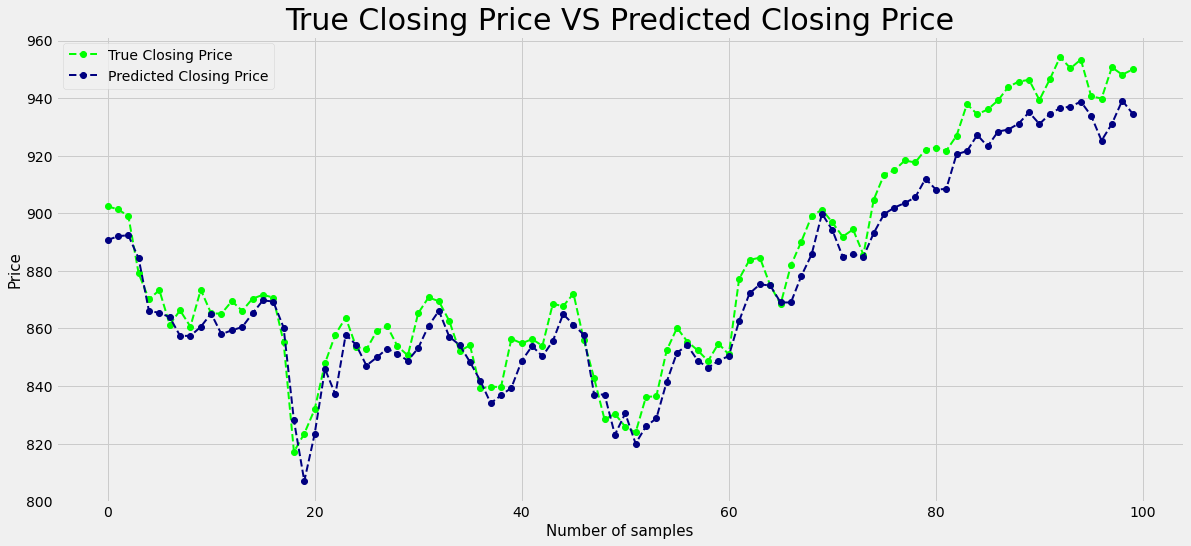

In [49]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.plot(Result['True Price'].values, 
             label='True Closing Price',
             marker='o', 
             linestyle='dashed',
             color='lime',
             linewidth=2, 
             markersize=6)
    plt.plot(Result['Model Prediction'].values, 
             label='Predicted Closing Price',
             color='navy',
             marker='o', 
             linestyle='dashed',
             linewidth=2, 
             markersize=6)
    plt.title(label='True Closing Price VS Predicted Closing Price', fontsize=30)
    plt.xlabel(xlabel='Number of samples', fontsize=15)
    plt.ylabel(ylabel='Price', fontsize=15)
    plt.legend()
    plt.show()

In [50]:
y_true = y_test.values.ravel()
y_pred = model_pred

In [51]:
'''it calculates how far off, on average, the predicted values are from the actual values. '''
mse = mean_squared_error(y_true, y_pred)
'''RMSE is derived from MSE by taking the square root. It gives us a measure of the average distance between the predicted values and the actual values. '''
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2_score_ = r2_score(y_true, y_pred)
'''The Explained Variance Score provides an estimate of how well the model captures the variability in the actual values.'''
evs_score = explained_variance_score(y_true, y_pred)

print(f"Mean squared error: {mse:.4f}")
print(f"Root mean squared error: {rmse:.4f}")
print(f"Mean absolute error: {mae:.4f}")
print(f"R2 score: {r2_score_:.4f}")
print(f"Variance score: {evs_score:.4f}")

Mean squared error: 0.0021
Root mean squared error: 0.0455
Mean absolute error: 0.0388
R2 score: 0.9337
Variance score: 0.9719


# Model Saving

In [52]:
model.save("models/ICICI_model.h5")

---